In [1]:
import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore', category=FutureWarning)
%matplotlib inline

(26, 2)

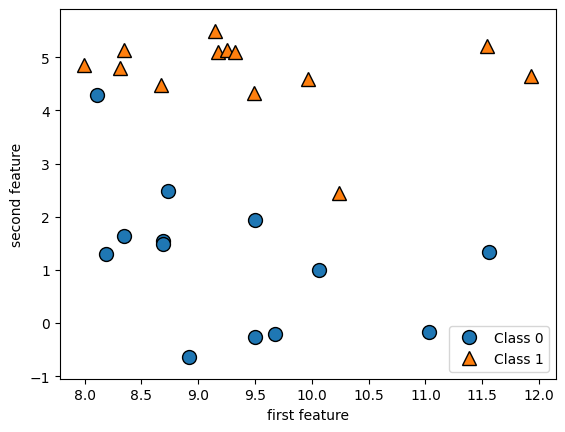

In [2]:
# 生成数据集 - 模拟二分类数据
X, y = mglearn.datasets.make_forge()

# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')
X.shape

Text(0, 0.5, 'Target')

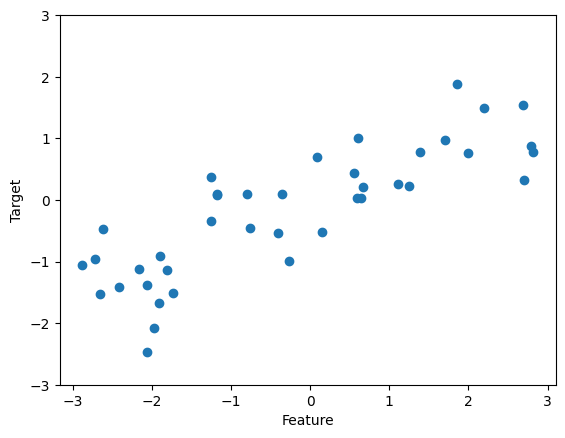

In [3]:
# 模拟回归数据 - 回归问题
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

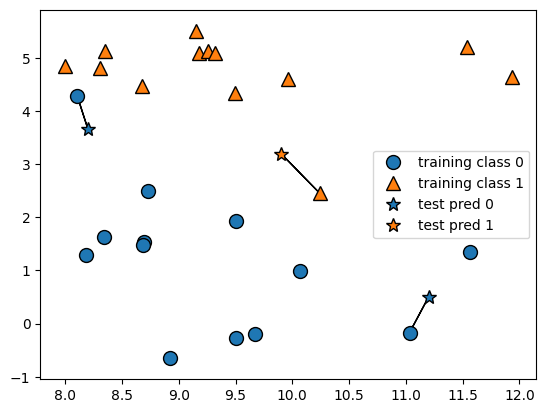

In [4]:
# 最简单的KNN
mglearn.plots.plot_knn_classification(n_neighbors=1)

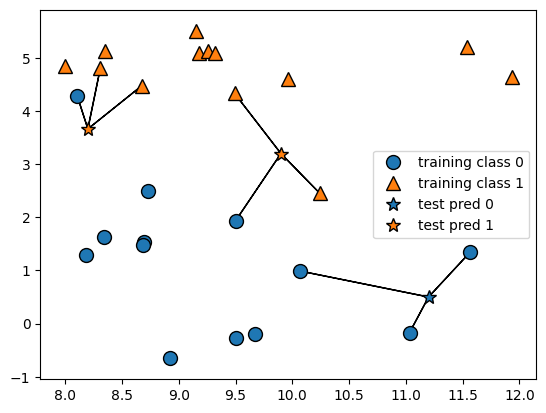

In [5]:
# 3个近邻
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
# sklearn knn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# 导入KNN类并实例化
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

# 利用训练集数据进行拟合
clf.fit(X_train, y_train)

# 调用predict方法对测试集进行预测
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [8]:
# 效果评估
clf.score(X_test, y_test)

0.8571428571428571

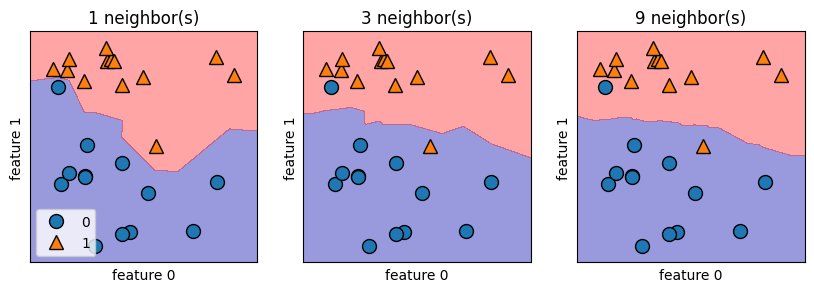

In [9]:
# 模型可视化
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

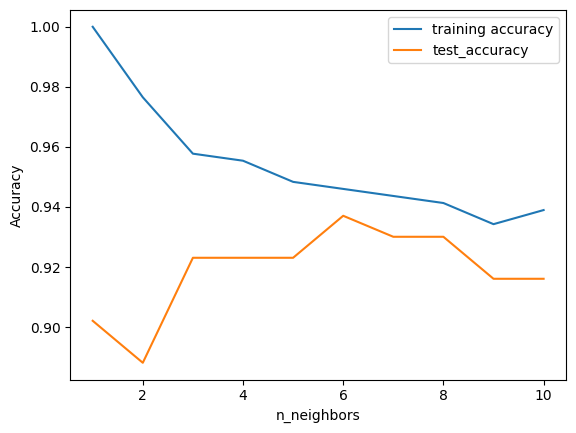

In [12]:
# 基于乳腺癌数据验证模型复杂度和泛化能力的关系
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighbors取值从1到10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # 记录精度
    training_accuracy.append(clf.score(X_train, y_train))

    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

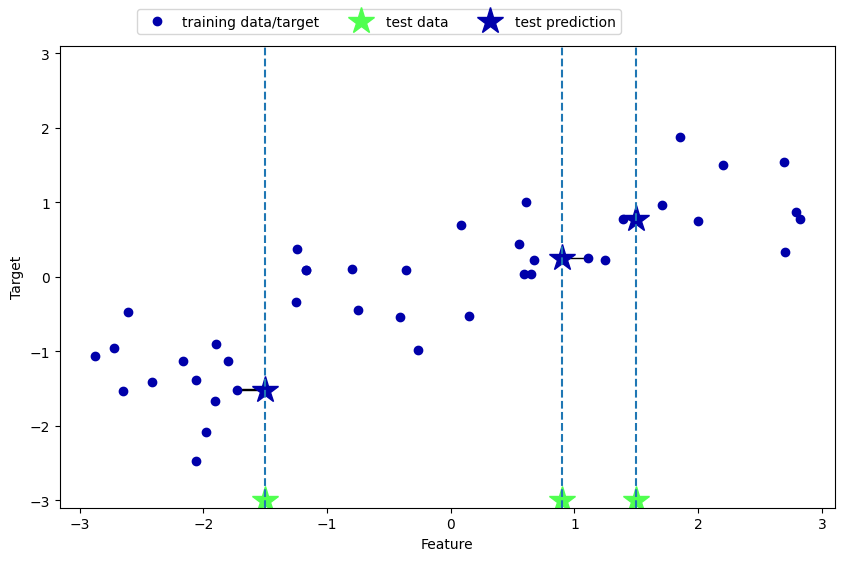

In [13]:
# k近邻回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

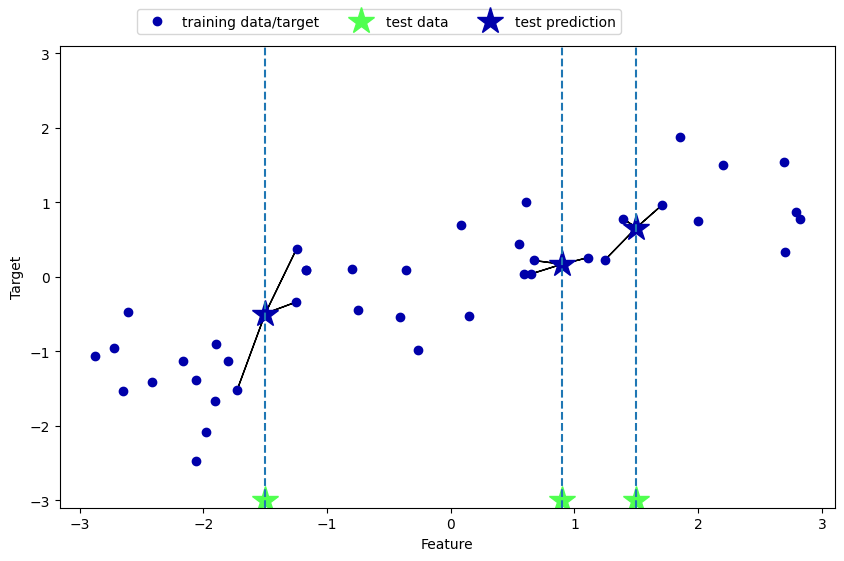

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
# sklearn实现
X, y = mglearn.datasets.make_wave()

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标值来拟合模型
reg.fit(X_train, y_train)

# 对测试集进行预测
reg.predict(X_test)

array([-0.79266538,  0.42776943,  0.42776943,  1.11237602,  0.42776943,
        0.89609343,  0.00297044,  1.33380525,  0.66577669, -0.34456666,
        1.65825902,  0.46201371, -0.59416201, -0.79266538,  1.7619226 ,
        0.66577669, -0.35075036, -0.53657219,  0.52456939,  0.66577669,
        1.11237602,  1.33380525,  0.66577669, -0.79266538,  0.19927087])

In [16]:
# 模型评估 R^2
reg.score(X_test, y_test)

0.6706208209942042

w[0]: 0.393906  b: -0.031804


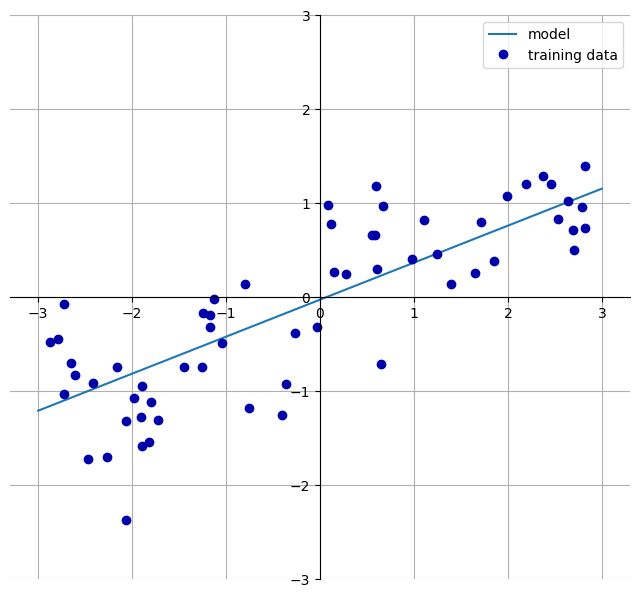

In [17]:
# 一维wave数据集上的线性模型
mglearn.plots.plot_linear_regression_wave()

In [6]:
# OLS
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.44153666]), -0.01711124414733381)

In [7]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6592061059587275, 0.6932519118518163)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


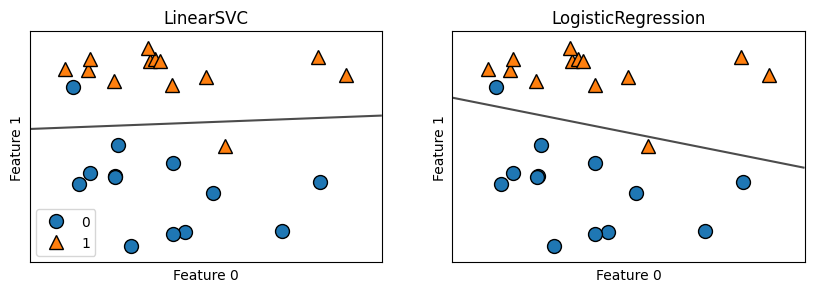

In [12]:
# 线性分类算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

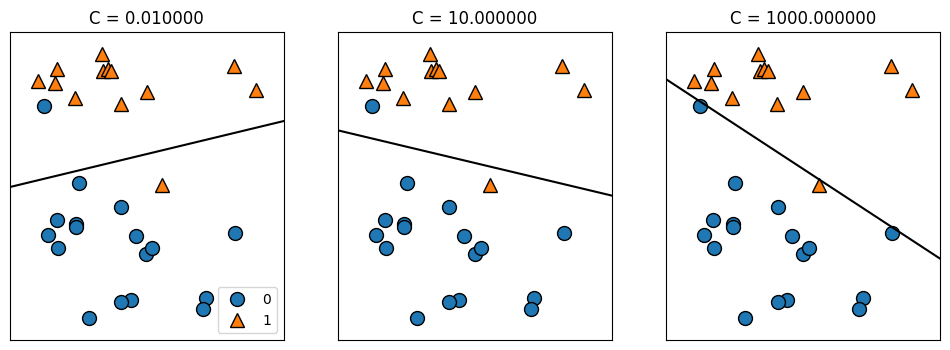

In [13]:
mglearn.plots.plot_linear_svc_regularization()

In [14]:
# 乳腺癌数据集测试逻辑回归
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9460093896713615, 0.965034965034965)

In [15]:
logreg = LogisticRegression(C=100).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9436619718309859, 0.958041958041958)

In [16]:
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9342723004694836, 0.9300699300699301)

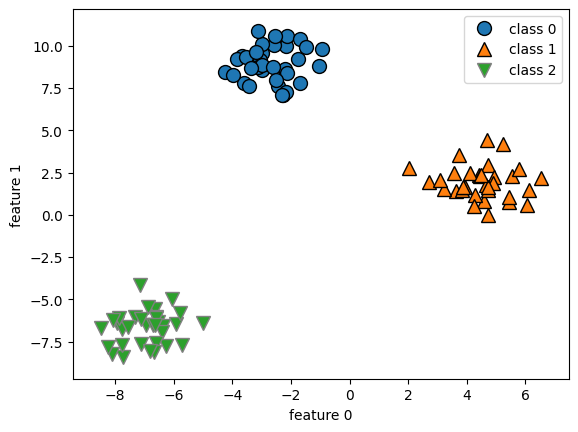

In [17]:
# 多分类任务
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [18]:
ls = LinearSVC().fit(X, y)
ls.coef_, ls.intercept_

(array([[-0.1749248 ,  0.23140862],
        [ 0.47621232, -0.06937491],
        [-0.18914282, -0.20399669]]),
 array([-1.0774574 ,  0.13140331, -0.08604829]))

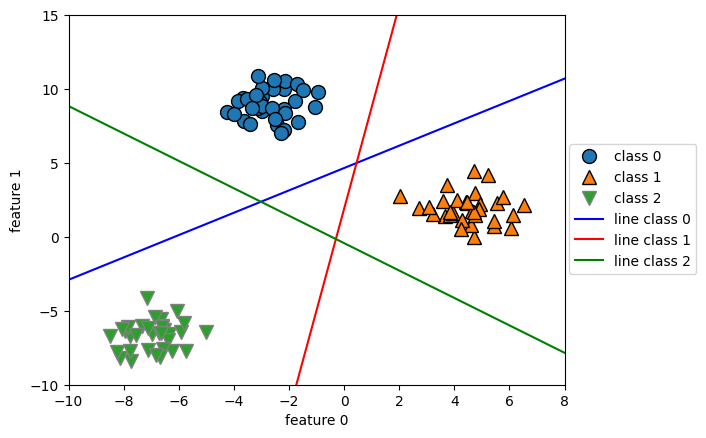

In [19]:
# 三个“一对其余”分类器学到的决策边界
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(ls.coef_, ls.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

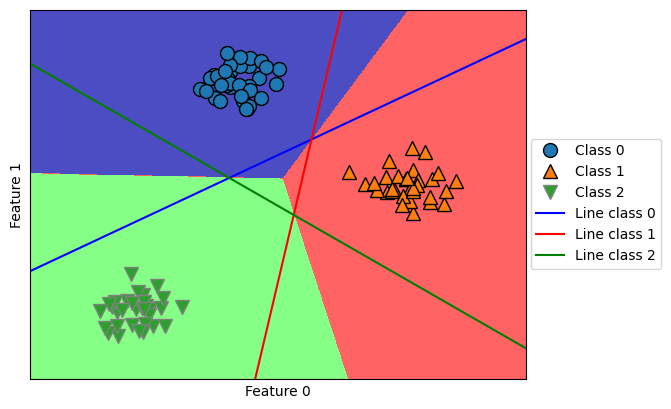

In [20]:
# 三个“一对其余”分类器得到的多分类决策边界
mglearn.plots.plot_2d_classification(ls, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(ls.coef_, ls.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
     'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [21]:
# BernoulliNB 分类器计算每个类别中每个特征不为 0 的元素个数
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
count = {}
for label in np.unique(y):
    count[label] = X[y == label].sum(axis=0)
count

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}

In [24]:
# 决策树 - 所有叶节点都是纯的
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [25]:
# 预剪树
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

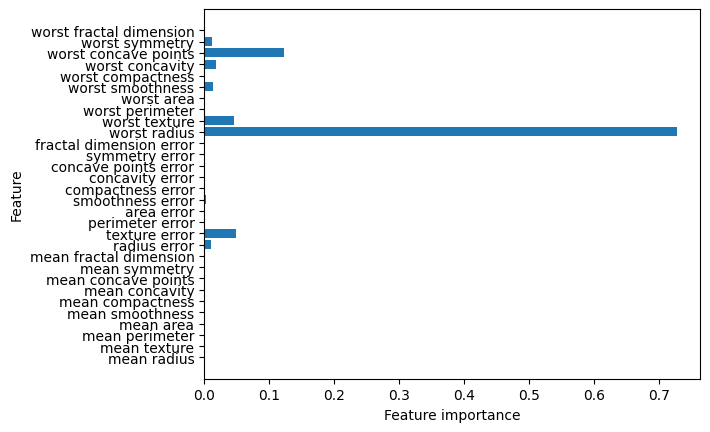

In [26]:
# 特征重要性
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

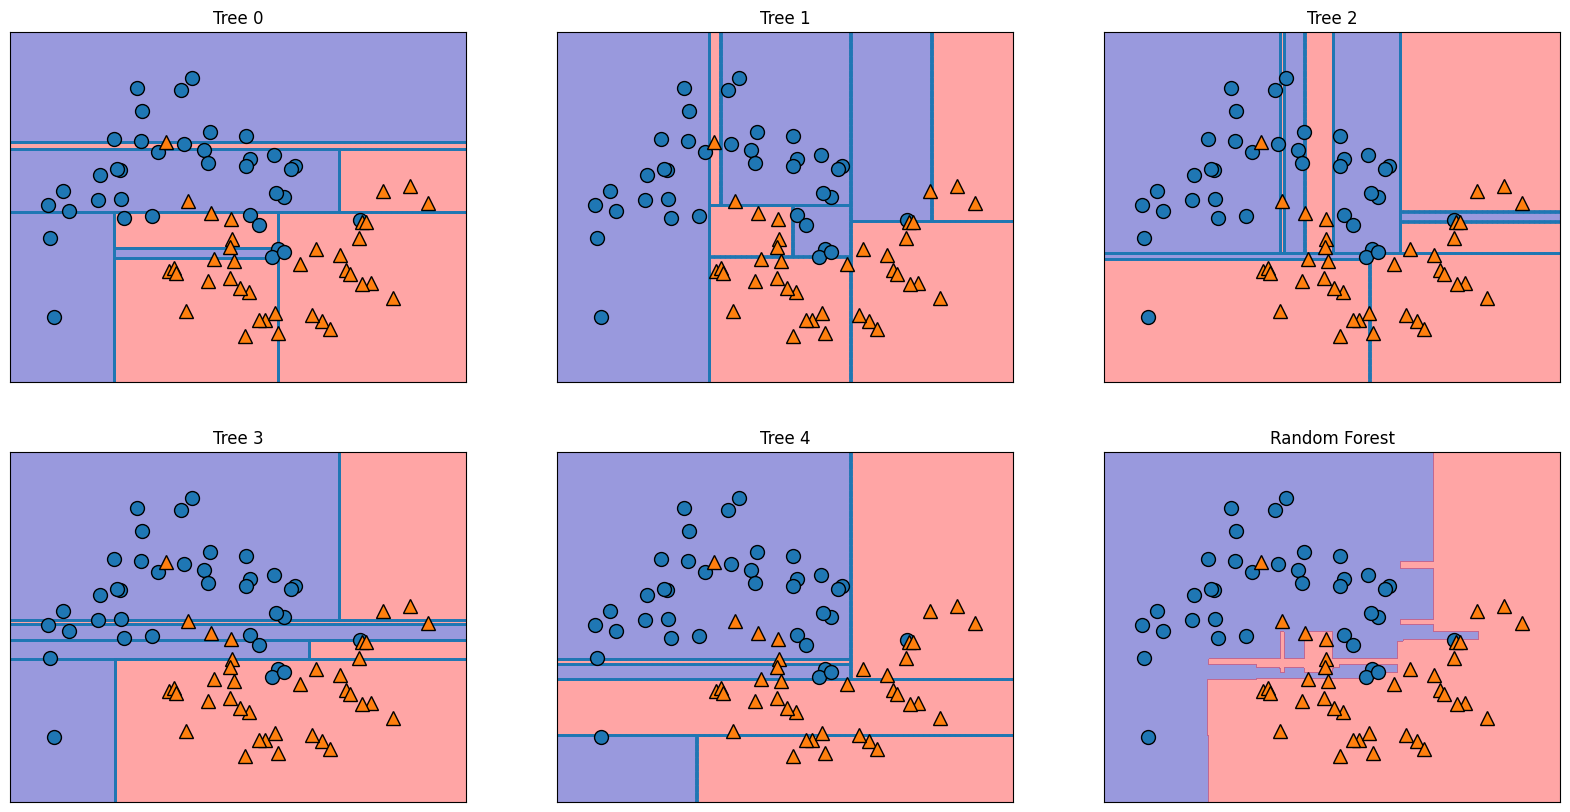

In [27]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=5, random_state=2)
rf.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(rf, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [28]:
# 将包含 100 棵树的随机森林应用在乳腺癌数据集上
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.972027972027972)

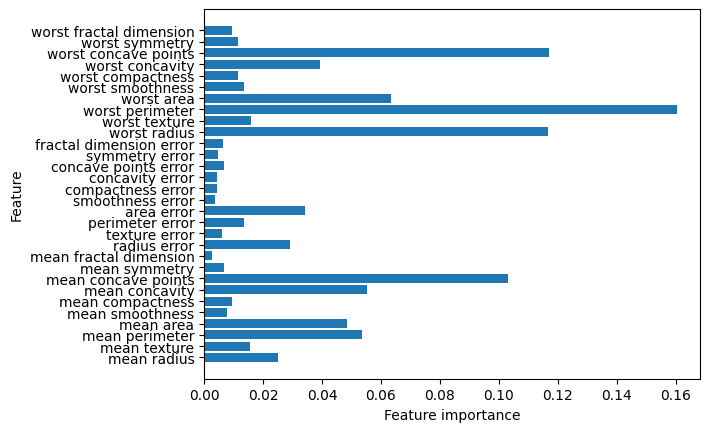

In [29]:
plot_feature_importances_cancer(forest)

In [31]:
# 梯度提升树
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.965034965034965)

In [32]:
# 预剪枝-防止过拟合
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [33]:
# 降低学习率
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.958041958041958)

Text(0, 0.5, 'Feature 1')

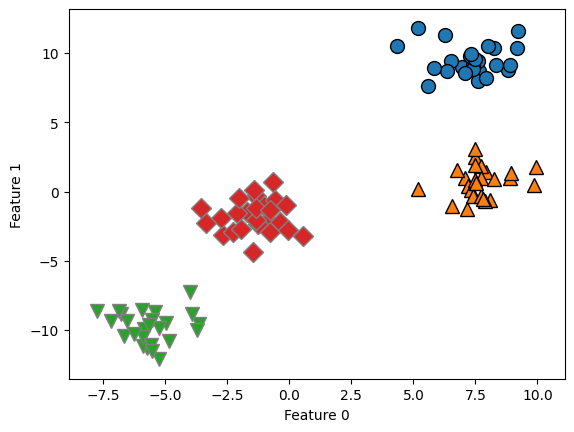

In [8]:
# 核支持向量机
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

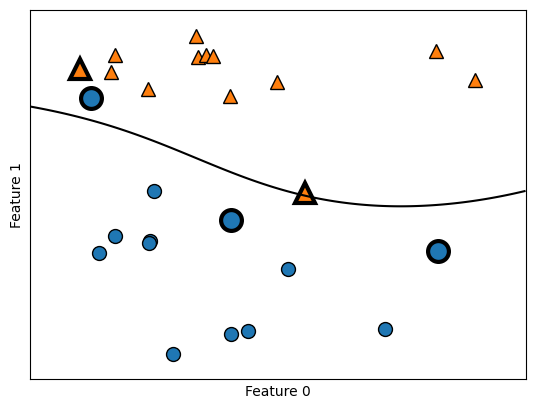

In [3]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 画出支持向量
sv = svm.support_vectors_

# 支持向量的类别标签由dual_coef_的正负号给出
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

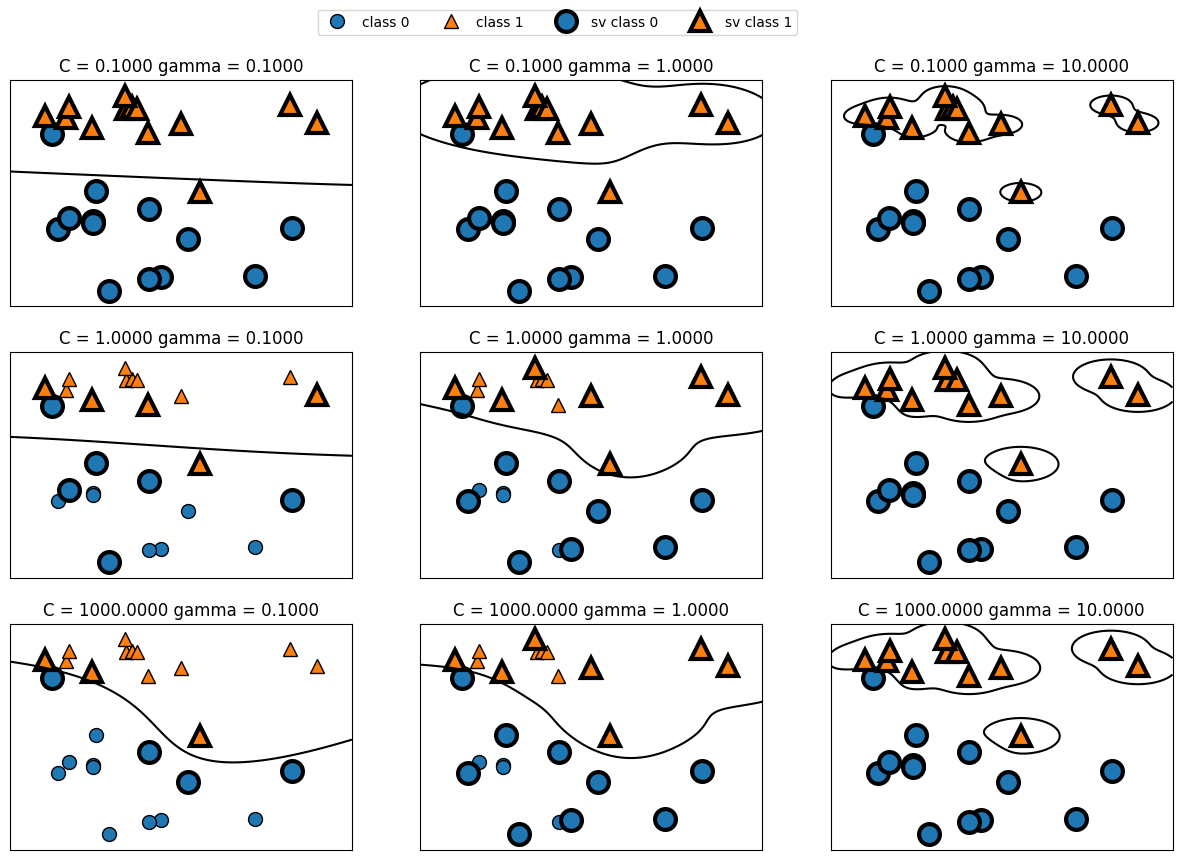

In [5]:
# 修改svm的参数
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [4]:
# 将RBF核SVM用于乳腺癌数据集
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


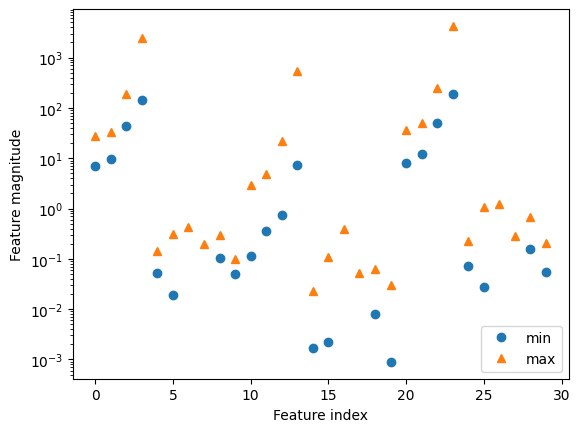

In [7]:
# 每个特征的最小值和最大值
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [5]:
# 为svm预处理数据
# 计算训练集中每个特征的最小值
min_on_training = X_train.min(axis=0)

# 计算每个特征的范围
range_on_training = (X_train - min_on_training).max(axis=0)

# 标准化
X_train_scaled = (X_train - min_on_training) / range_on_training

# 利用训练集的最小值和范围对测试集做同样变换
X_test_scaled = (X_test - min_on_training) / range_on_training

# 模型拟合
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

accuracy on training set: 0.984
accuracy on test set: 0.972


In [6]:
# 调整参数C
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print('accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

accuracy on training set: 1.000
accuracy on test set: 0.958


Text(0, 0.5, 'relu(x), tanh(x)')

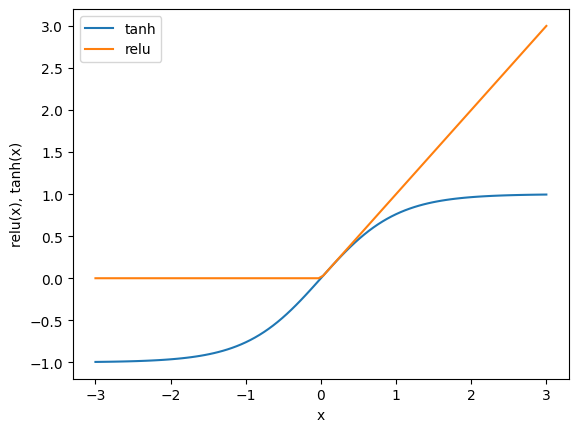

In [8]:
# MLP - 前馈神经网络
# 激活函数
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Text(0, 0.5, 'Feature 1')

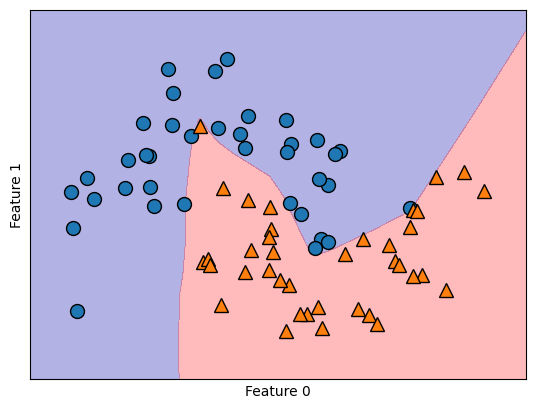

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

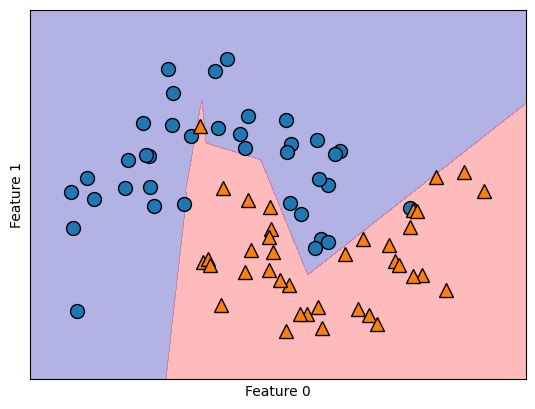

In [15]:
# 减少隐节点个数，降低模型复杂度
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=500)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

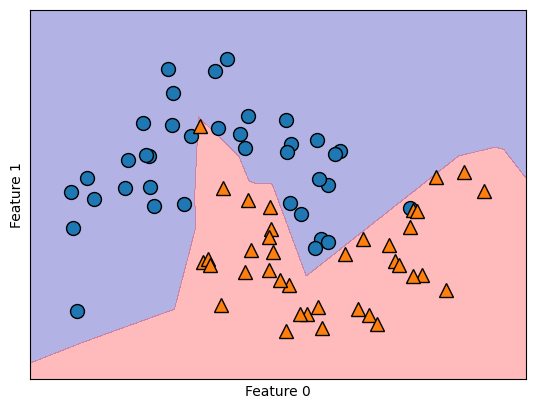

In [16]:
# 增加隐节点层数
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

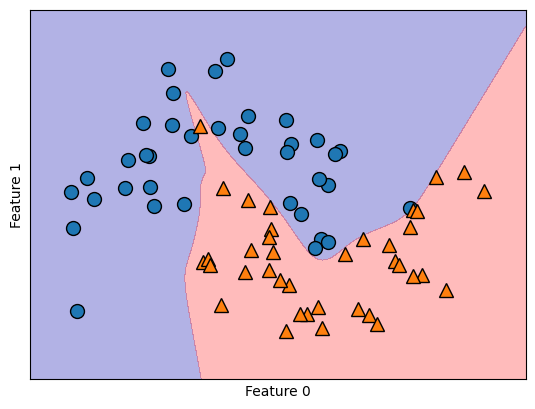

In [18]:
# 增加隐节点层数, 使用tanh激活函数
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh', max_iter=300)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

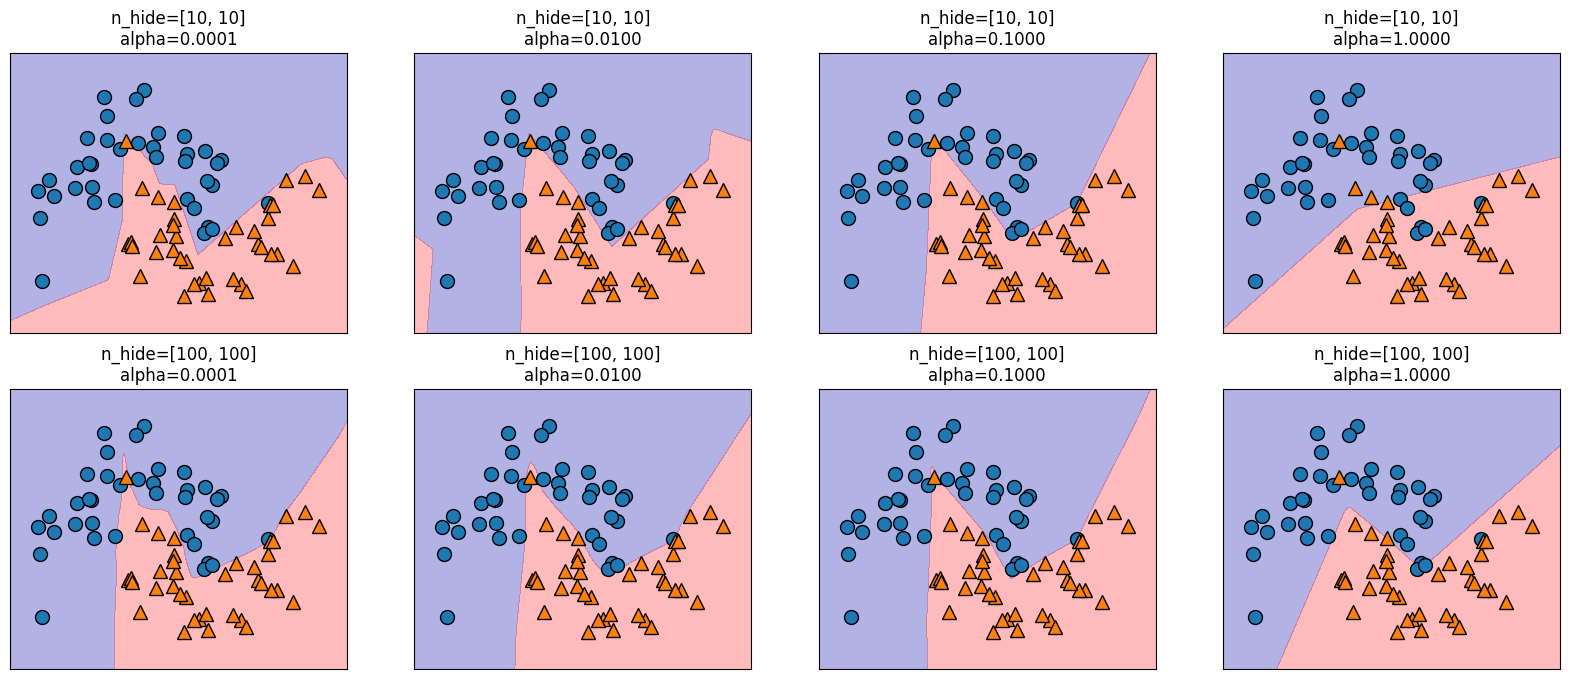

In [23]:
# 正则化：越强模型越简单
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hide_node in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hide_node, n_hide_node], alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hide=[{}, {}]\nalpha={:.4f}'.format(n_hide_node, n_hide_node, alpha))

In [24]:
# 在乳腺癌数据集使用MLP
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


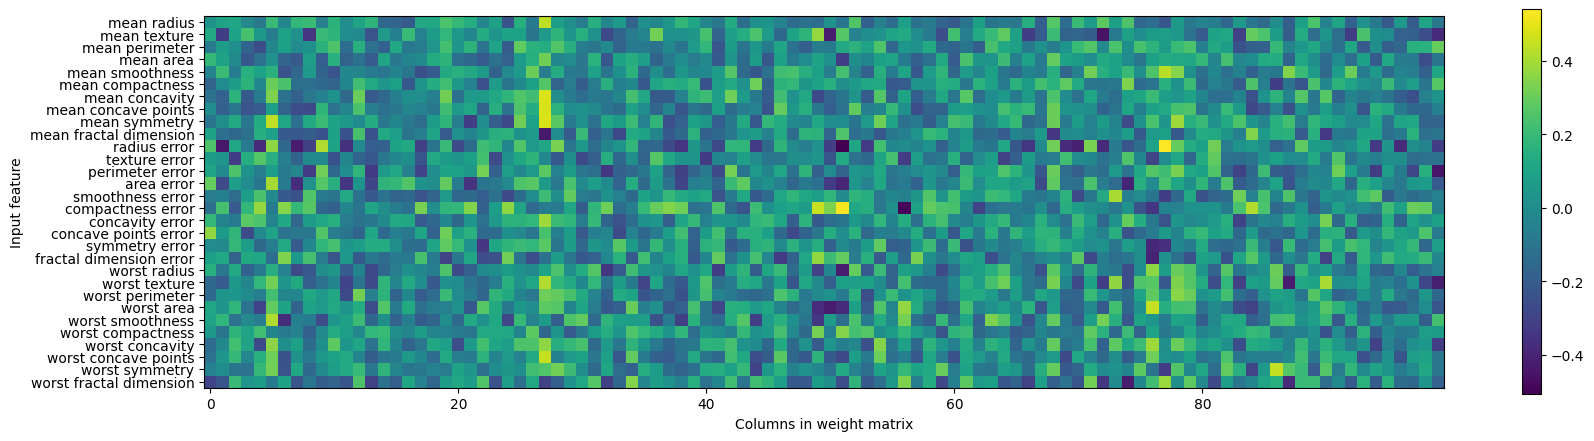

In [28]:
# 神经网络在乳腺癌数据集上学到的第一个隐层权重的热图
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [29]:
# 分类器的不确定度估计
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [31]:
# 对于二分类， decision_function为每个样本都返回一个浮点数
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

# 显示decision_function的前几个元素
print(f'Decision function:\n{gbrt.decision_function(X_test)[:6]}')

# 可以通过仅查看决策函数的正负号来再现预测值
print(f'Threshold decision function:\n{gbrt.decision_function(X_test) > 0}')
print(f'Predictions:\n{gbrt.predict(X_test)}')

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]
Threshold decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [32]:
# 预测概率
print(f'Predicted probabilities:\n{gbrt.predict_proba(X_test[:6])}')

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


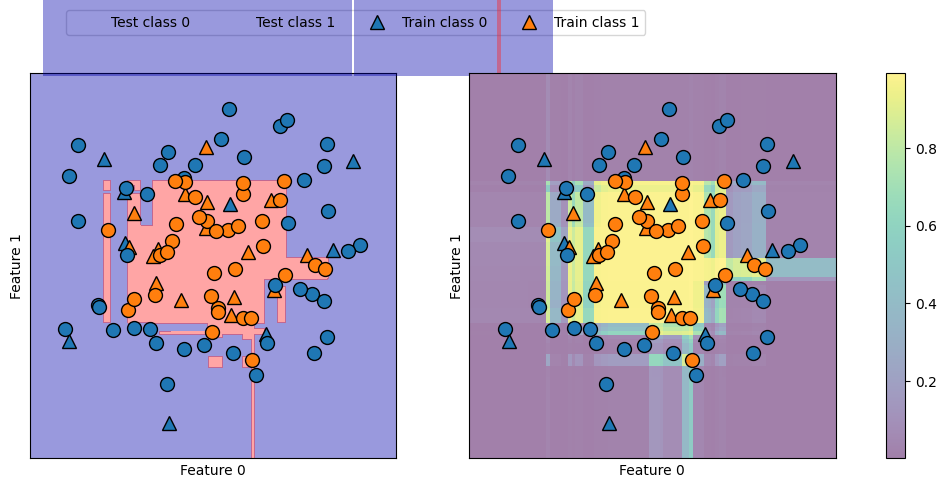

In [36]:
# 梯度提升模型的决策边界（左）和预测概率
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, function='predict_proba')

for ax in axes:
    # 画出训练点和测试点
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

In [38]:
# 多分类问题的不确定度
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print(f'Decision function:\n{gbrt.decision_function(X_test)[:6], :}')

Decision function:
(array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]]),)
